In [1]:
import os
import tempfile

import scanpy as sc
import scvi
from rich import print

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


/home/bnvlab2/miniconda3/lib/python3.12/site-packages/anndata/utils.py:429: FutureWarning: Importing read_csv from `anndata` is deprecated. Import anndata.io.read_csv instead.
  warnings.warn(msg, FutureWarning)
/home/bnvlab2/miniconda3/lib/python3.12/site-packages/anndata/utils.py:429: FutureWarning: Importing read_excel from `anndata` is deprecated. Import anndata.io.read_excel instead.
  warnings.warn(msg, FutureWarning)
/home/bnvlab2/miniconda3/lib/python3.12/site-packages/anndata/utils.py:429: FutureWarning: Importing read_hdf from `anndata` is deprecated. Import anndata.io.read_hdf instead.
  warnings.warn(msg, FutureWarning)
/home/bnvlab2/miniconda3/lib/python3.12/site-packages/anndata/utils.py:429: FutureWarning: Importing read_loom from `anndata` is deprecated. Import anndata.io.read_loom instead.
  warnings.warn(msg, FutureWarning)
/home/bnvlab2/miniconda3/lib/python3.12/site-packages/anndata/utils.py:429: FutureWarning: Importing read_mtx from `anndata` is deprecated. Import

In [2]:
import matplotlib.pyplot as plt

In [6]:
import pandas as pd

In [131]:
import anndata as ad

# keep what you had in raw
raw_X   = adata_randall.raw.X
raw_obs = adata_randall.obs.copy()
raw_var = adata_randall.raw.var.copy()

# drop forbidden column if present
if "_index" in raw_var.columns:
    raw_var = raw_var.drop(columns=["_index"])

# rebuild raw
adata_randall.raw = ad.AnnData(
    X=raw_X,
    obs=raw_obs,
    var=raw_var,
)


In [132]:
adata_randall.write_h5ad("/home/bnvlab2/Documents/Kate/Alzheimer/Randall_organoids/randall150_meta_upd.h5ad")

In [126]:
adata_randall  = sc.read('/home/bnvlab2/Documents/Kate/Alzheimer/Randall_organoids/randall150_subset_ES_scores.h5ad')

In [127]:
#adata_randall.obs.drop(columns=['cell_type_pred', 'cell_type_pred_upd', 'cell_type_uncert'], inplace=True)
meta = pd.read_csv("/home/bnvlab2/scVI_brain_organoids/organoids/celltype_predictions/meta_randall_celltype_pred3.csv", index_col=0)
#adata_test.obs = adata_test.obs.join(meta, how="left")
meta2 = pd.read_csv("/home/bnvlab2/scVI_brain_organoids/organoids/celltype_predictions/meta_randall4_7_V2.csv", index_col=0)
metadata_all = meta[['cell_type_pred3_upd']].join(meta2, how="left")
adata_randall.obs = adata_randall.obs.join(metadata_all, how="left")

In [128]:
adata_test = sc.read('/home/bnvlab2/scVI_brain_organoids/organoids/randall_reemdedding_annotated.h5ad')
meta2 = adata_test.obs[['leiden_res2', 'leiden', 'CytoTRACE2_Score' ]]
adata_randall.obs = adata_randall.obs.join(meta2, how="left")
#del(adata_test)

In [129]:
adata_randall.obs['cell_type_pred3_upd2'] = adata_randall.obs['cell_type_pred3_upd'].copy()
adata_randall.obs.loc[ adata_randall.obs['leiden_res2'].astype(str) == '18',  'cell_type_pred3_upd2'] = 'Progenitors Prolif'

In [11]:
## adata_test = sc.read("/home/bnvlab2/scVI_brain_organoids/organoids/objects/randall_new_emb_annot_3.h5ad")

In [40]:
adata_randall.layers['counts'] = adata_randall.raw.X.copy() 
adata_randall.raw = adata_randall

In [53]:
import scanpy as sc
from sccoda.util import cell_composition_data as dat
from sccoda.util import comp_ana as mod

In [60]:
import numpy as np
import jax

In [61]:
np.random.seed(42)
key = jax.random.PRNGKey(42)

In [49]:
SAMPLE_COL     = "condition"
CONDITION_COL  = "True_Condition_PSEN"
CELLTYPE_COL   = "cell_type_pred3_upd2"


In [42]:
adata_randall.obs['True_Condition'] = adata_randall.obs['True_Condition'].astype('str').astype('category')
genotype_mapping = {
    '0': "ApoE3WT/PSEN1 E280A",
    '1': "ApoE3Ch/PSEN1 E280A",
    '2': "ApoE3WT/PSEN1WT",
    '3': "ApoE3Ch/PSEN1WT"
}
adata_randall.obs["True_Condition2"] = adata_randall.obs["True_Condition"].map(genotype_mapping)
genotype_mapping1 = {
    "ApoE3WT/PSEN1 E280A" : 'PSEN1 E280A',
    "ApoE3Ch/PSEN1 E280A" :'PSEN1 E280A',
    "ApoE3WT/PSEN1WT" : 'PSEN1WT',
    "ApoE3Ch/PSEN1WT" : 'PSEN1WT'
}
adata_randall.obs["True_Condition_PSEN"] = adata_randall.obs["True_Condition2"].map(genotype_mapping1)

In [44]:
pd.crosstab(adata_randall.obs["True_Condition_PSEN"], adata_randall.obs["condition"])

condition,D22-578,D22-579,D22-580,D22-581,D22-1008,D22-1009,D22-1010,D22-1011
True_Condition_PSEN,,,,,,,,
PSEN1 E280A,12464,11426,0,9237,0,10730,8402,5453
PSEN1WT,0,0,12276,0,19141,0,0,0


In [45]:
cats = ["PSEN1WT", "PSEN1 E280A"]  # example order
adata_randall.obs["True_Condition_PSEN"] = (
    adata_randall.obs["True_Condition_PSEN"]
      .astype("category")
      .cat.reorder_categories(cats, ordered=True)
)



In [46]:
import os
os.getpid()

1290327

In [47]:
reference_cell_type="automatic"

In [50]:
obs = adata_randall.obs[[SAMPLE_COL, CONDITION_COL, CELLTYPE_COL]].copy()
obs[SAMPLE_COL]   = obs[SAMPLE_COL].astype(str)
obs[CELLTYPE_COL] = obs[CELLTYPE_COL].astype(str)

# sample × cell-type counts (no CategoricalIndex headaches)
counts_df = (
    obs.pivot_table(
        index=SAMPLE_COL,
        columns=CELLTYPE_COL,
        values=CELLTYPE_COL,
        aggfunc="count",
        fill_value=0,
    ).astype(int)
)

counts_df = (
    adata_randall.obs.groupby([SAMPLE_COL, CELLTYPE_COL])
    .size()
    .unstack(fill_value=0)
)
# make columns a plain Index (not CategoricalIndex)
counts_df.columns = pd.Index(counts_df.columns.tolist(), name=None)

# covariates per sample
cov_df = (
    obs[[SAMPLE_COL, CONDITION_COL]]
    .drop_duplicates(subset=[SAMPLE_COL])
)

# merge on the column, then set index
df = (
    counts_df.reset_index()
    .merge(cov_df, on=SAMPLE_COL, how="left")
    .set_index(SAMPLE_COL)
)


/tmp/ipykernel_1290327/2721194164.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  adata_randall.obs.groupby([SAMPLE_COL, CELLTYPE_COL])


In [51]:
# import tensorflow as tf
# tf.config.run_functions_eagerly(True)  # add BEFORE calling sample_hmc()
import os
os.environ["CUDA_VISIBLE_DEVICES"] = ""  # force CPU (no GPU visible)

import tensorflow as tf
tf.config.set_visible_devices([], "GPU")  # double-check no GPU is used

2025-11-11 14:47:14.771078: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1762890434.821773 1290327 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1762890434.835644 1290327 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1762890434.945771 1290327 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1762890434.945798 1290327 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1762890434.945799 1290327 computation_placer.cc:177] computation placer alr

In [54]:
data_all = dat.from_pandas(df, covariate_columns=[CONDITION_COL])

In [62]:
import gc
gc.collect()

1672

In [63]:
model = mod.CompositionalAnalysis(
    data_all,
    formula=CONDITION_COL,
    reference_cell_type="automatic"
)
results = model.sample_hmc()

print(results.summary())
print(results.credible_effects())

Automatic reference selection! Reference cell type set to Mature Neurons


100%|████████████████████████████████████| 20000/20000 [01:10<00:00, 285.50it/s]


MCMC sampling finished. (84.650 sec)
Acceptance rate: 54.7%
Compositional Analysis summary:

Data: 8 samples, 12 cell types
Reference index: 6
Formula: True_Condition_PSEN

Intercepts:
                    Final Parameter  Expected Sample
Cell Type                                           
Choroid Plexus                0.780      1062.157058
Early Ependymal               0.241       619.589449
Early Neurons                 1.626      2475.151980
Ependymal                    -0.945       189.247764
Glial Progenitors            -0.895       198.950705
IPC                          -0.586       270.983269
Mature Neurons               -0.745       231.147741
Mesenchyma                    0.246       622.695154
NC derived neurons           -0.828       212.737089
Neural crest                  0.135       557.274022
Progenitors Prolif            0.805      1089.045691
Radial Glia                   2.004      3612.145078


Effects:
                                                       Final P

None

Covariate                           Cell Type         
True_Condition_PSEN[T.PSEN1 E280A]  Choroid Plexus        False
                                    Early Ependymal       False
                                    Early Neurons         False
                                    Ependymal             False
                                    Glial Progenitors     False
                                    IPC                   False
                                    Mature Neurons        False
                                    Mesenchyma            False
                                    NC derived neurons     True
                                    Neural crest          False
                                    Progenitors Prolif    False
                                    Radial Glia            True
Name: Final Parameter, dtype: bool

In [65]:
palette_cell_types = {'Progenitors Prolif': '#aec7e8', 
 'Radial Glia' : '#ffbb78', 
 'IPC' : '#d62728',  
'Early Neurons': '#ff7f0e',
 'Mature Neurons' : '#8c564b',  
'NC derived neurons': '#b5bd61',  
 'Glial Progenitors' : '#aa40fc',   
 'Early Ependymal': '#98df8a', 
 'Ependymal' : '#279e68',  
 'Choroid Plexus' :  '#1f77b4',
 'Neural crest' : '#17becf',
 'Mesenchyma': '#e377c2'} 

In [55]:
import pandas as pd
import matplotlib.pyplot as plt

# Extract tidy effects
effect_df = results.effect_df.copy().reset_index()  # columns: Covariate, Cell Type, log2-fold change, ...
cred_df = results.credible_effects().reset_index()
cred_df.columns = ["Covariate", "Cell Type", "Credible"]

# Merge credible flags
merged = pd.merge(effect_df, cred_df, on=[ 'Covariate',"Cell Type"], how="left")

# Select the covariate you want to plot
covariate_of_interest = "True_Condition_PSEN[T.PSEN1WT]"
#df_plot = merged[merged["Covariate"] == covariate_of_interest]

# Sort by effect size
df_plot = merged.sort_values("log2-fold change")

<BarContainer object of 12 artists>

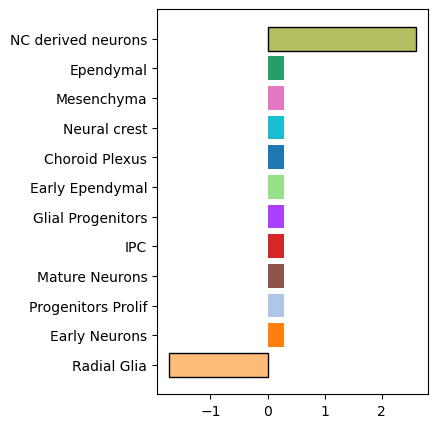

In [59]:
# your palette
palette_dict = {
    'Progenitors Prolif': '#aec7e8',
    'Radial Glia': '#ffbb78',
    'IPC': '#d62728',
    'Early Neurons': '#ff7f0e',
    'Mature Neurons': '#8c564b',
    'NC derived neurons': '#b5bd61',
    'Glial Progenitors': '#aa40fc',
    'Early Ependymal': '#98df8a',
    'Ependymal': '#279e68',
    'Choroid Plexus': '#1f77b4',
    'Neural crest': '#17becf',
    'Mesenchyma': '#e377c2'
}

# map colors to each bar
df_plot["color"] = df_plot["Cell Type"].map(palette_dict).fillna("#808080")
plt.figure(figsize=(3.5, 5))

# (optional) keep credibility via edge style
#edge = df_plot["Credible"].map({True: "black", False: "none"})
#lw   = df_plot["Credible"].map({True: 1.5,  False: 0.6})
#alp  = df_plot["Credible"].map({True: 1.0,  False: 0.7})

plt.barh(
    df_plot["Cell Type"],
    df_plot["log2-fold change"],
    color=df_plot["color"],
    edgecolor=edge,
   # linewidth=lw,
  #  alpha=alp
)


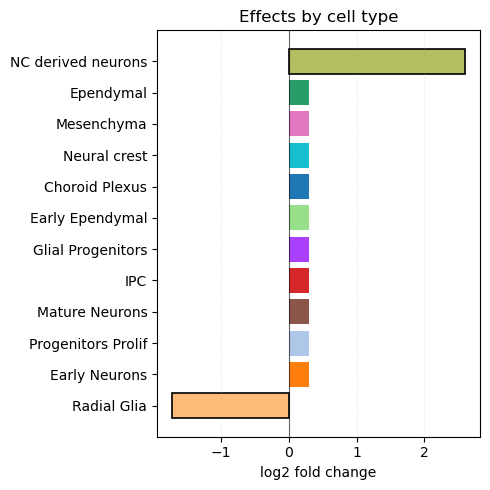

In [63]:
import os
import matplotlib.pyplot as plt

# map colors
df_plot["color"] = df_plot["Cell Type"].map(palette_dict).fillna("#808080")

fig, ax = plt.subplots(figsize=(5, 5))
bars = ax.barh(
    df_plot["Cell Type"],
    df_plot["log2-fold change"],
    color=df_plot["color"].tolist(),
)

# Optional: highlight credible effects with a black edge
if "Credible" in df_plot.columns:
    for b, cred in zip(bars, df_plot["Credible"].tolist()):
        if cred:
            b.set_edgecolor("black")
            b.set_linewidth(1.2)
        else:
            b.set_edgecolor("none")
            b.set_linewidth(0.6)

# cosmetics
ax.axvline(0, color="k", lw=0.8, alpha=0.6)
ax.set_xlabel("log2 fold change")
ax.set_ylabel("")
ax.set_title("Effects by cell type")
ax.grid(axis="x", linestyle=":", alpha=0.3)
fig.tight_layout()

# save
os.makedirs("figures", exist_ok=True)
fig.savefig("figures/effects_barh.pdf", bbox_inches="tight")
#fig.savefig("figures/effects_barh.png", dpi=300, bbox_inches="tight")
plt.show(fig)


In [108]:
t = adata_randall.obs['cell_type_pred3_upd2'].value_counts()
(t/t.sum()*100).round(1)

In [116]:
(t/t.sum()*100).round(1)

cell_type_pred3_upd2
Early Neurons         21.5
Radial Glia           20.6
Choroid Plexus        10.5
Neural crest          10.5
Progenitors Prolif     9.5
Early Ependymal        8.0
NC derived neurons     7.8
Mesenchyma             7.2
IPC                    1.5
Glial Progenitors      1.1
Mature Neurons         1.0
Ependymal              0.7
Name: count, dtype: float64

In [71]:
t = pd.crosstab(adata_randall.obs['cell_type_pred3_upd2'], adata_randall.obs['True_Condition_PSEN'])

In [72]:
t.apply(lambda x: x/x.sum()*100, axis=0).round(1)

True_Condition_PSEN,PSEN1WT,PSEN1 E280A
cell_type_pred3_upd2,,
Choroid Plexus,8.9,11.4
Early Ependymal,2.6,11.0
Early Neurons,26.5,18.7
Ependymal,0.2,0.9
Glial Progenitors,1.2,1.1
IPC,2.7,0.8
Mature Neurons,0.9,1.0
Mesenchyma,7.4,7.1
NC derived neurons,0.1,12.0


In [73]:
pd.crosstab(adata_randall.obs['cell_type_pred3_upd2'], adata_randall.obs['True_Condition_PSEN'])

True_Condition_PSEN,PSEN1WT,PSEN1 E280A
cell_type_pred3_upd2,,
Choroid Plexus,2797,6604
Early Ependymal,819,6346
Early Neurons,8320,10811
Ependymal,65,532
Glial Progenitors,379,617
IPC,847,461
Mature Neurons,282,595
Mesenchyma,2334,4110
NC derived neurons,42,6930


In [74]:
adata_randall.obs['cell_type_pred3_upd2'].value_counts()

cell_type_pred3_upd2
Early Neurons         19131
Radial Glia           18384
Choroid Plexus         9401
Neural crest           9347
Progenitors Prolif     8507
Early Ependymal        7165
NC derived neurons     6972
Mesenchyma             6444
IPC                    1308
Glial Progenitors       996
Mature Neurons          877
Ependymal               597
Name: count, dtype: int64

In [91]:
from anndata import AnnData  
from typing import Optional
import seaborn as sns
import numpy as np

In [101]:
data_all

AnnData object with n_obs × n_vars = 8 × 12
    obs: 'True_Condition_PSEN'

In [103]:
from sccoda.util import cell_composition_data as dat
from sccoda.util import data_visualization as viz

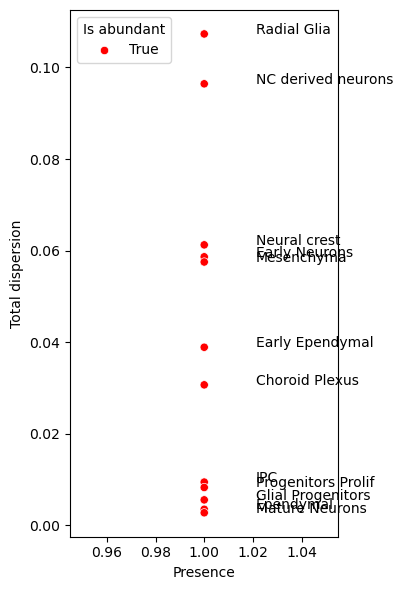

In [98]:
rel_abundance_dispersion_plot(
    data=data_all,
    #figsize = (10,5),
    abundant_threshold=0.0000000099
)
plt.show()

In [75]:
counts_df

,Choroid Plexus,Early Ependymal,Early Neurons,Ependymal,Glial Progenitors,IPC,Mature Neurons,Mesenchyma,NC derived neurons,Neural crest,Progenitors Prolif,Radial Glia
condition,,,,,,,,,,,,
D22-578,659,855,3223,20,14,251,83,2317,142,398,1442,3060
D22-579,836,1746,3639,116,143,80,197,195,952,1733,754,1035
D22-580,2281,601,2530,31,4,214,57,1968,27,140,689,3734
D22-581,907,1948,1341,111,69,13,109,807,1046,1867,727,292
D22-1008,516,218,5790,34,375,633,225,366,15,648,2202,8119
D22-1009,2208,592,2138,92,226,79,146,489,1125,1335,925,1375
D22-1010,1234,703,389,99,58,23,55,25,2512,1794,977,533
D22-1011,760,502,81,94,107,15,5,277,1153,1432,791,236


In [118]:
t = adata_randall.obs['cell_type_pred3_upd2'].value_counts()
t2 = (t/t.sum()*100).round(1)
t2

cell_type_pred3_upd2
Early Neurons         21.5
Radial Glia           20.6
Choroid Plexus        10.5
Neural crest          10.5
Progenitors Prolif     9.5
Early Ependymal        8.0
NC derived neurons     7.8
Mesenchyma             7.2
IPC                    1.5
Glial Progenitors      1.1
Mature Neurons         1.0
Ependymal              0.7
Name: count, dtype: float64

In [122]:
cell_types_references = t2[t2 >5].index.values

In [125]:
for celltype in cell_types_references :
    print(celltype)
    model = mod.CompositionalAnalysis(
    data_all,
    formula=CONDITION_COL,
    reference_cell_type=celltype
    )
    results = model.sample_hmc()
    #print(results.summary())
    print(results.credible_effects())

Early Neurons

100%|████████████████████████████████████| 20000/20000 [01:11<00:00, 279.52it/s]


MCMC sampling finished. (88.274 sec)
Acceptance rate: 52.1%


Covariate                           Cell Type         
True_Condition_PSEN[T.PSEN1 E280A]  Choroid Plexus        False
                                    Early Ependymal       False
                                    Early Neurons         False
                                    Ependymal             False
                                    Glial Progenitors     False
                                    IPC                   False
                                    Mature Neurons        False
                                    Mesenchyma            False
                                    NC derived neurons     True
                                    Neural crest          False
                                    Progenitors Prolif    False
                                    Radial Glia           False
Name: Final Parameter, dtype: bool

Radial Glia

100%|████████████████████████████████████| 20000/20000 [00:52<00:00, 380.76it/s]


MCMC sampling finished. (66.647 sec)
Acceptance rate: 58.8%


Covariate                           Cell Type         
True_Condition_PSEN[T.PSEN1 E280A]  Choroid Plexus        False
                                    Early Ependymal       False
                                    Early Neurons         False
                                    Ependymal             False
                                    Glial Progenitors     False
                                    IPC                   False
                                    Mature Neurons        False
                                    Mesenchyma            False
                                    NC derived neurons    False
                                    Neural crest          False
                                    Progenitors Prolif    False
                                    Radial Glia           False
Name: Final Parameter, dtype: bool

Choroid Plexus

100%|████████████████████████████████████| 20000/20000 [00:52<00:00, 380.64it/s]


MCMC sampling finished. (66.928 sec)
Acceptance rate: 41.0%


Covariate                           Cell Type         
True_Condition_PSEN[T.PSEN1 E280A]  Choroid Plexus        False
                                    Early Ependymal       False
                                    Early Neurons         False
                                    Ependymal             False
                                    Glial Progenitors     False
                                    IPC                   False
                                    Mature Neurons        False
                                    Mesenchyma            False
                                    NC derived neurons     True
                                    Neural crest          False
                                    Progenitors Prolif    False
                                    Radial Glia            True
Name: Final Parameter, dtype: bool

Neural crest

100%|████████████████████████████████████| 20000/20000 [00:52<00:00, 379.33it/s]


MCMC sampling finished. (67.038 sec)
Acceptance rate: 60.3%


Covariate                           Cell Type         
True_Condition_PSEN[T.PSEN1 E280A]  Choroid Plexus        False
                                    Early Ependymal       False
                                    Early Neurons         False
                                    Ependymal             False
                                    Glial Progenitors     False
                                    IPC                   False
                                    Mature Neurons        False
                                    Mesenchyma            False
                                    NC derived neurons     True
                                    Neural crest          False
                                    Progenitors Prolif    False
                                    Radial Glia            True
Name: Final Parameter, dtype: bool

Progenitors Prolif

100%|████████████████████████████████████| 20000/20000 [00:53<00:00, 377.04it/s]


MCMC sampling finished. (67.454 sec)
Acceptance rate: 56.8%


Covariate                           Cell Type         
True_Condition_PSEN[T.PSEN1 E280A]  Choroid Plexus        False
                                    Early Ependymal       False
                                    Early Neurons         False
                                    Ependymal             False
                                    Glial Progenitors     False
                                    IPC                   False
                                    Mature Neurons        False
                                    Mesenchyma            False
                                    NC derived neurons     True
                                    Neural crest          False
                                    Progenitors Prolif    False
                                    Radial Glia            True
Name: Final Parameter, dtype: bool

Early Ependymal

100%|████████████████████████████████████| 20000/20000 [00:52<00:00, 379.91it/s]


MCMC sampling finished. (66.978 sec)
Acceptance rate: 49.6%


Covariate                           Cell Type         
True_Condition_PSEN[T.PSEN1 E280A]  Choroid Plexus        False
                                    Early Ependymal       False
                                    Early Neurons         False
                                    Ependymal             False
                                    Glial Progenitors     False
                                    IPC                   False
                                    Mature Neurons        False
                                    Mesenchyma            False
                                    NC derived neurons     True
                                    Neural crest          False
                                    Progenitors Prolif    False
                                    Radial Glia            True
Name: Final Parameter, dtype: bool

NC derived neurons

100%|████████████████████████████████████| 20000/20000 [00:51<00:00, 386.05it/s]


MCMC sampling finished. (65.945 sec)
Acceptance rate: 48.1%


Covariate                           Cell Type         
True_Condition_PSEN[T.PSEN1 E280A]  Choroid Plexus        False
                                    Early Ependymal       False
                                    Early Neurons         False
                                    Ependymal             False
                                    Glial Progenitors     False
                                    IPC                   False
                                    Mature Neurons        False
                                    Mesenchyma            False
                                    NC derived neurons    False
                                    Neural crest          False
                                    Progenitors Prolif    False
                                    Radial Glia           False
Name: Final Parameter, dtype: bool

Mesenchyma

100%|████████████████████████████████████| 20000/20000 [00:51<00:00, 385.93it/s]


MCMC sampling finished. (65.765 sec)
Acceptance rate: 58.6%


Covariate                           Cell Type         
True_Condition_PSEN[T.PSEN1 E280A]  Choroid Plexus        False
                                    Early Ependymal       False
                                    Early Neurons         False
                                    Ependymal             False
                                    Glial Progenitors     False
                                    IPC                   False
                                    Mature Neurons        False
                                    Mesenchyma            False
                                    NC derived neurons     True
                                    Neural crest          False
                                    Progenitors Prolif    False
                                    Radial Glia            True
Name: Final Parameter, dtype: bool

/home/bnvlab2/miniconda3/lib/python3.12/site-packages/sccoda/util/data_visualization.py:335: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(cell_types, rotation=90)


<Figure size 1800x600 with 0 Axes>

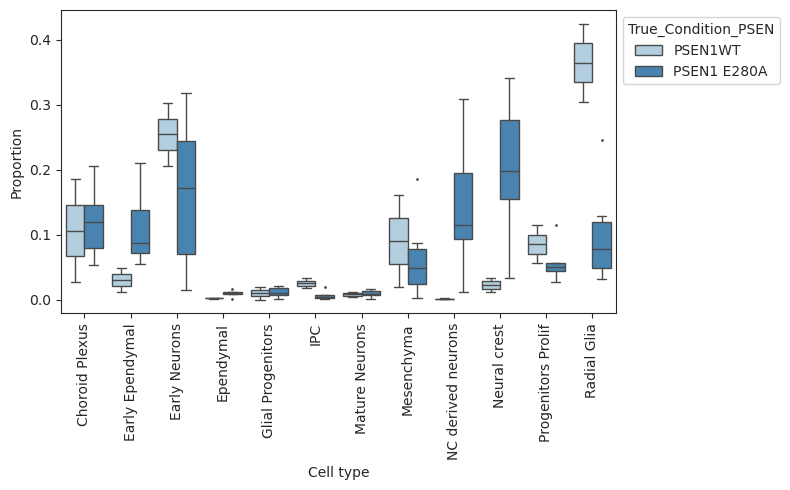

In [36]:
plt.figure(figsize=(18, 6))
viz.boxplots(
    data_all,
    feature_name="True_Condition_PSEN",
    plot_facets=False,
    y_scale="relative",
    add_dots=False,
    figsize = (8,5)
)
plt.savefig("scCODA_composition.pdf", dpi=300)
plt.show()

# # Grouped boxplots. Facets, log scale, added dots and custom color palette.
# viz.boxplots(
#     data_mouse,
#     feature_name="Condition",
#     plot_facets=True,
#     y_scale="log",
#     add_dots=True,
#     cmap="Reds",
# )
# plt.show()

/home/bnvlab2/miniconda3/lib/python3.12/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/home/bnvlab2/miniconda3/lib/python3.12/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/home/bnvlab2/miniconda3/lib/python3.12/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/home/bnvlab2/miniconda3/lib/python3.12/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette

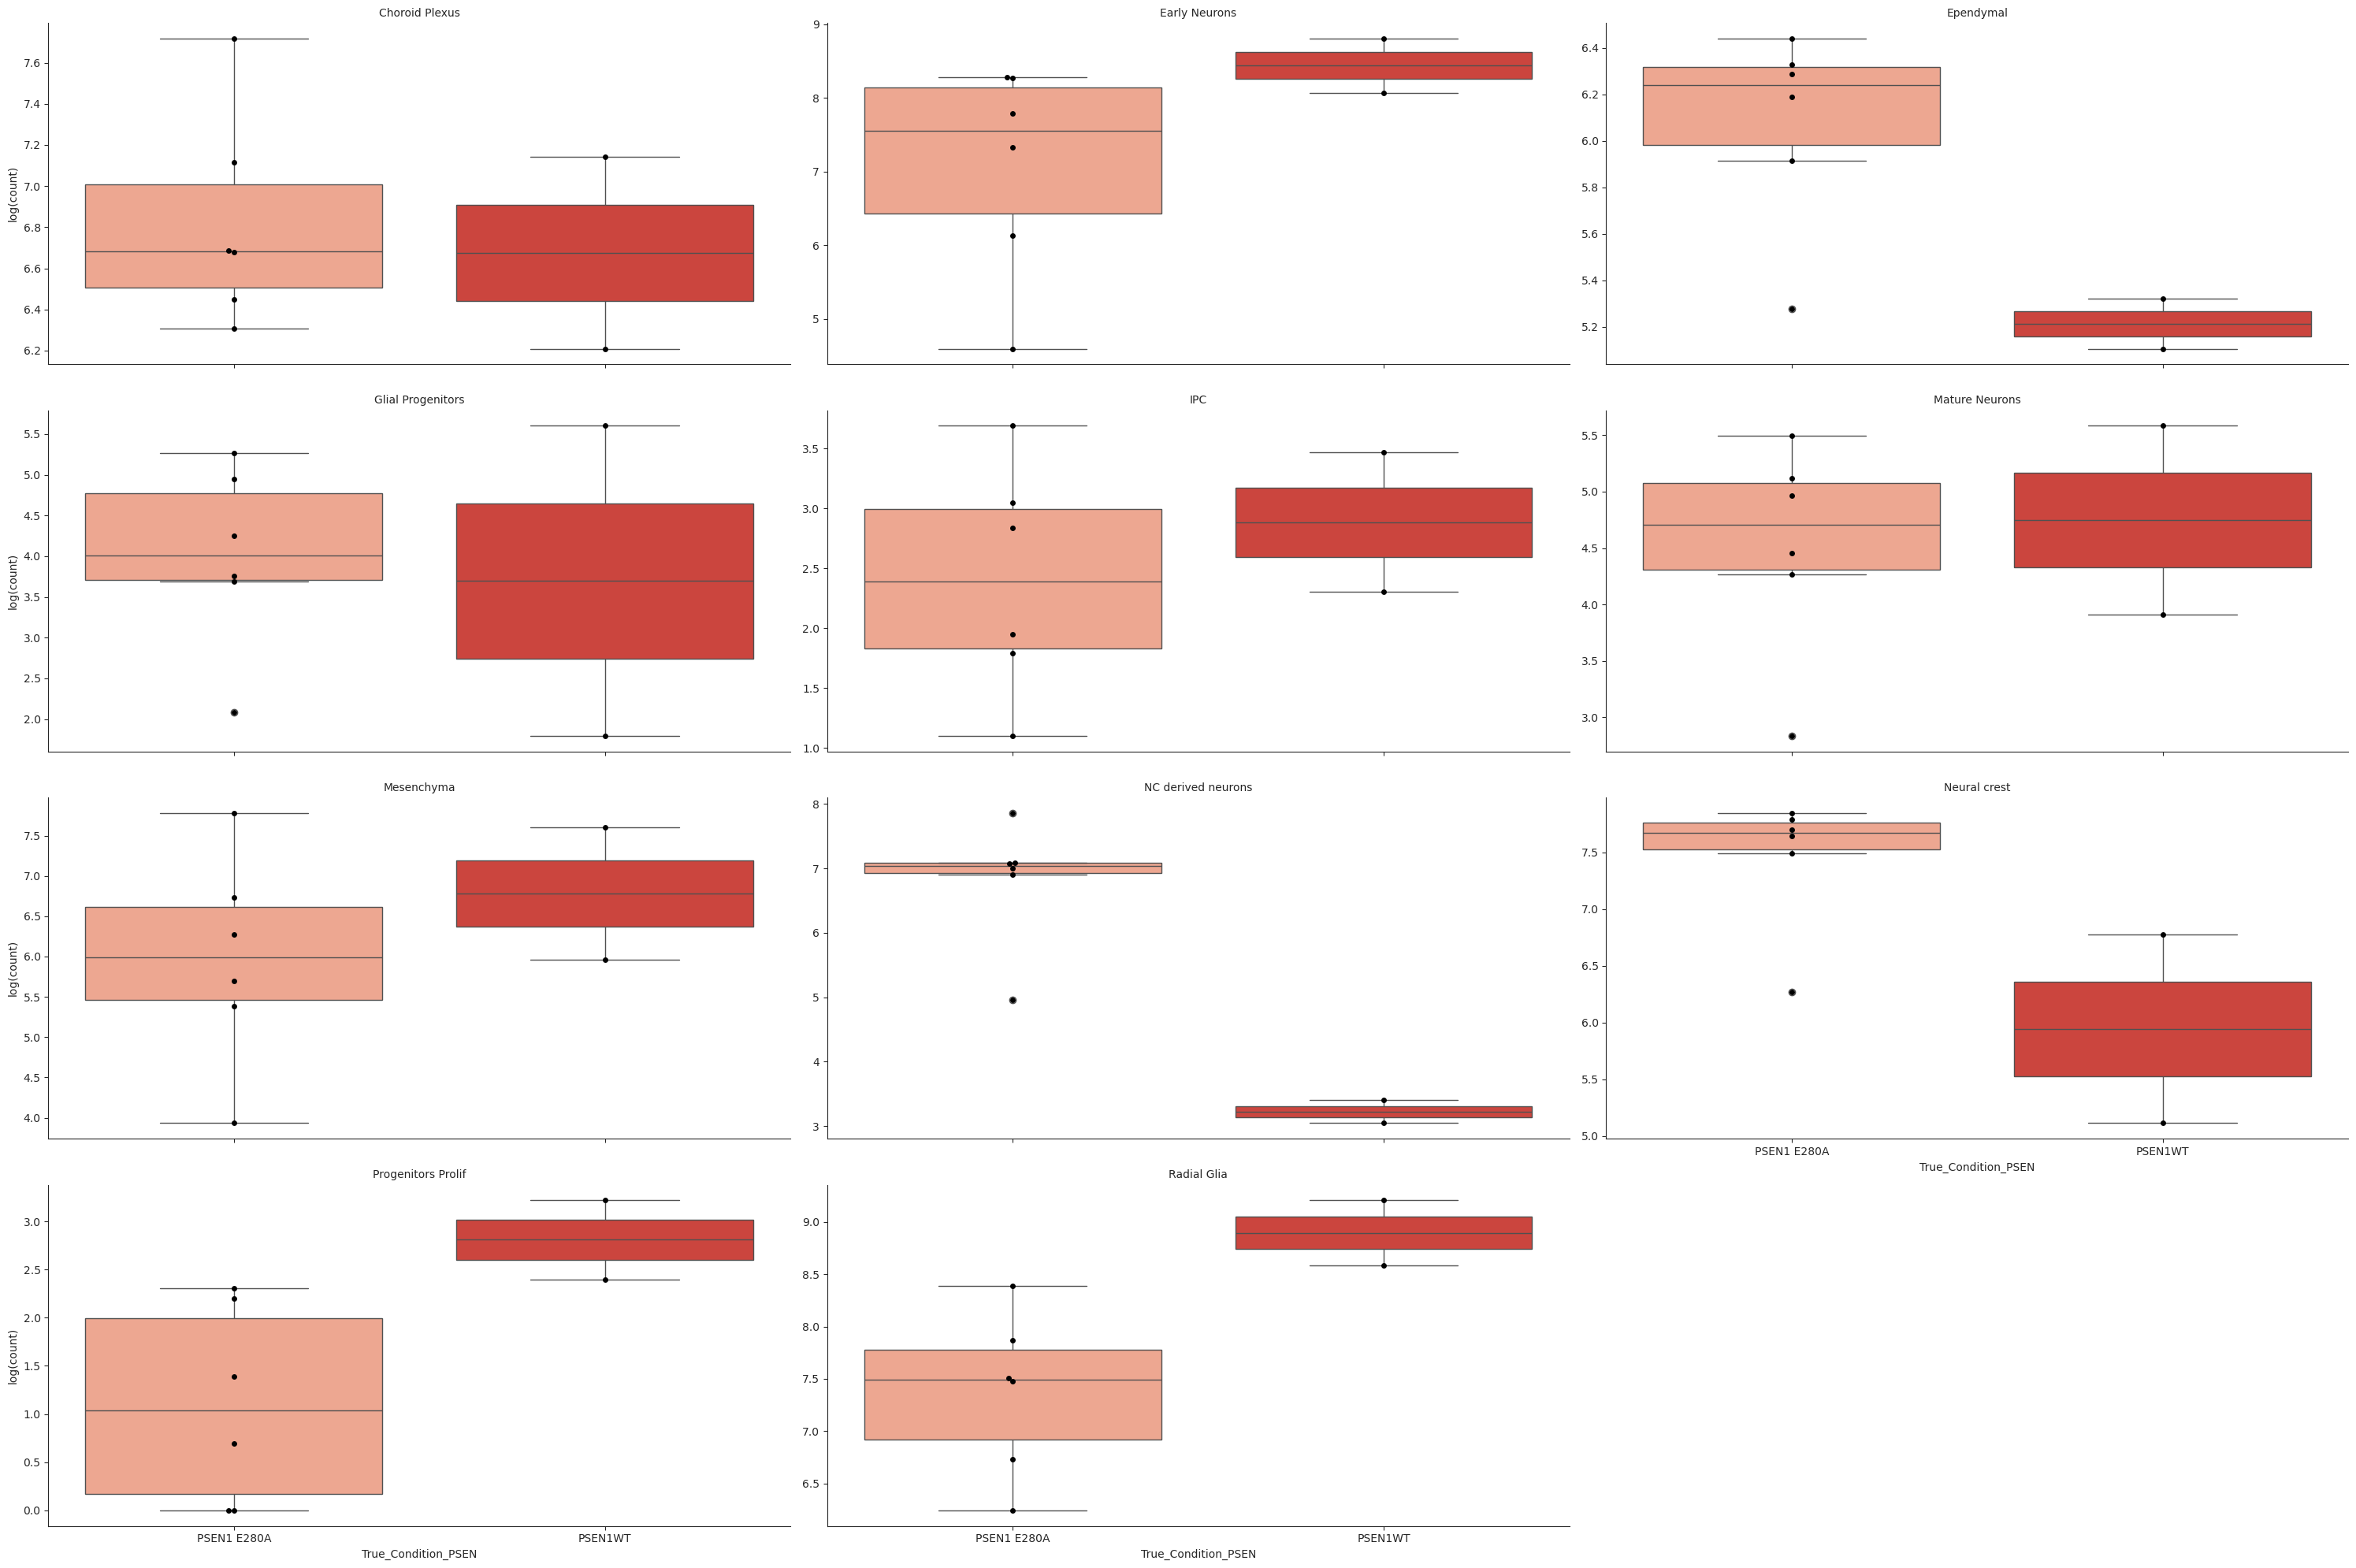

In [37]:
# Grouped boxplots. Facets, log scale, added dots and custom color palette.
viz.boxplots(
    data_all,
    feature_name="True_Condition_PSEN",
    plot_facets=True,
    y_scale="log",
    add_dots=True,
    cmap="Reds",
)
plt.show()

In [36]:
import numpy as np
import pandas as pd

# data_all.X: samples × celltypes
counts = np.asarray(data_all.X)
celltypes = data_all.var.index

totals = counts.sum(axis=0)
abundance = pd.Series(totals, index=celltypes).sort_values(ascending=False)
print(abundance)               # total counts per cell type
print("Most abundant:", abundance.index[0])


Radial Glia           27264
Early Neurons         22144
Neural crest          12607
Choroid Plexus         8007
NC derived neurons     7275
Mesenchyma             6711
Ependymal              3138
Mature Neurons         1035
Glial Progenitors       764
IPC                     128
Progenitors Prolif       55
dtype: int64

Most abundant: Radial Glia

In [37]:
# sample metadata is in data_all.obs
cond = data_all.obs[CONDITION_COL].astype(str).values

by_cond = (
    pd.DataFrame(counts, columns=celltypes)
    .assign(condition=cond)
    .groupby("condition")
    .sum()
    .T
)
print(by_cond)                           # counts per cell type per condition
print(by_cond.div(by_cond.sum(axis=0)))  # fractions per condition


condition           PSEN1 E280A  PSEN1WT
Choroid Plexus             6248     1759
Early Neurons             12293     9851
Ependymal                  2770      368
Glial Progenitors           489      275
IPC                          88       40
Mature Neurons              721      314
Mesenchyma                 4326     2385
NC derived neurons         7226       49
Neural crest              11566     1041
Progenitors Prolif           21       34
Radial Glia               11963    15301

condition           PSEN1 E280A   PSEN1WT
Choroid Plexus         0.108264  0.055989
Early Neurons          0.213010  0.313556
Ependymal              0.047998  0.011713
Glial Progenitors      0.008473  0.008753
IPC                    0.001525  0.001273
Mature Neurons         0.012493  0.009995
Mesenchyma             0.074960  0.075914
NC derived neurons     0.125210  0.001560
Neural crest           0.200412  0.033135
Progenitors Prolif     0.000364  0.001082
Radial Glia            0.207292  0.487029